Ch16 数组变形
# 数组变形
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib import cm 
# 导入色谱

import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [83]:
import numpy as np 
a = np.arange(12)            # 创建一个长度为12 的一维数组 
b = np.reshape(a, (3, 4))    # 改变为3 行4 列的二维数组 
c = np.reshape(a, (2, 3, 2)) # 改变为2 个3 行2 列的三维数组
list =[a,b,c]
for i in list:
    print(i) 

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]


In [91]:
print(c[1][0][1])

7


### 定义可视化函数

In [2]:
def visualize_2D(array, title, vmax, vmin):
    
    fig_width  = math.ceil(array.shape[1] * 0.5)
    fig_length = math.ceil(array.shape[0] * 0.5)
    
    fig, ax = plt.subplots(figsize=(fig_width, fig_length))
    # 注意，seaborn.heatmap() 目前只能接受2D数组
    # 本书中，一维数组可视化时用圆圈
    # 可视化时，只有二维、三维数组用方块
    
    sns.heatmap(array, 
                vmax = vmax,
                vmin = vmin,
                annot = True,      # 增加注释
                fmt = ".0f",       # 注释数值的格式
                square = True,     # 热图方格为正方形
                cmap = 'RdYlBu_r', # 指定色谱
                linewidths = .5,   # 方格线宽
                cbar = False,      # 不显示色谱条
                yticklabels=False, # 不显示纵轴标签
                xticklabels=False, # 不显示横轴标签
                ax = ax)           # 指定绘制热图的轴
    
    fig.savefig('Figures/' + title + '.svg', format='svg')

# 定义绘制一元数组可视化函数

def visualize_1D(array, title):
    fig, ax = plt.subplots()

    colors = cm.RdYlBu_r(np.linspace(0,1,len(array)))

    for idx in range(len(array)):

        circle_idx = plt.Circle((idx, 0), 0.5, facecolor=colors[idx], edgecolor = 'w')
        ax.add_patch(circle_idx)
        ax.text(idx, 0, s = str(array[idx]),
                horizontalalignment = 'center',
                verticalalignment = 'center')

    ax.set_xlim(-0.6, 0.6 + len(array))
    ax.set_ylim(-0.6, 0.6)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    fig.savefig('Figures/' + title + '.svg', format='svg')


In [97]:
import numpy as np

# 创建一个3行4列2深度的三维数组
a = np.arange(24).reshape((3, 4, 2))

# 将三维数组重塑为二维数组
b = np.reshape(a, (2,3,-1))

print('a =', a)
print('b =', b)

a = [[[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]
  [12 13]
  [14 15]]

 [[16 17]
  [18 19]
  [20 21]
  [22 23]]]
b = [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


### 生成1D数组

In [3]:
a_1D_array = np.arange(-7, 7 + 1)
a_1D_array

array([-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7])

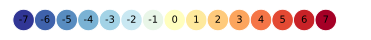

In [4]:
visualize_1D(a_1D_array, '1D数组')

In [5]:
len(a_1D_array)
# 长度

15

In [6]:
# 形状
a_1D_array.shape

(15,)

In [7]:
# 维数
a_1D_array.ndim

1

### 变形为行向量，1行15列

In [8]:
a_row_vector = a_1D_array.reshape(1,-1)
# 有时候，当你想要改变数组的形状，但是不确定新的形状应该是多少时，你可以使用 -1 这个特殊值来指定某一个维度的大小
a_row_vector

array([[-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7]])

In [9]:
np.reshape(a_1D_array, (1,-1))
# 把numpy.reshape() 当成一个函数来用

array([[-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7]])

In [10]:
np.reshape(a_1D_array, (1,15))
# 把numpy.reshape() 当成一个函数来用

array([[-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7]])

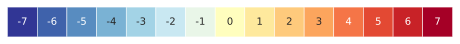

In [11]:
visualize_2D(a_row_vector, '行向量', 7, -7)

In [12]:
# 形状
a_row_vector.shape

(1, 15)

In [13]:
# 维数
a_row_vector.ndim

2

In [14]:
a_1D_array.reshape(1,15) 

array([[-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7]])

In [15]:
a_1D_array.reshape(-1,15) 

array([[-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7]])

In [16]:
a_1D_array.reshape(1,len(a_1D_array)) 

array([[-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7]])

### 改成列向量，15行1列

In [17]:
a_col_vector = a_1D_array.reshape(-1,1)
a_col_vector

array([[-7],
       [-6],
       [-5],
       [-4],
       [-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7]])

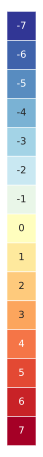

In [18]:
visualize_2D(a_col_vector, '列向量', 7, -7)

In [19]:
a_col_vector.shape

(15, 1)

In [20]:
a_1D_array.reshape(-1,1)

array([[-7],
       [-6],
       [-5],
       [-4],
       [-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7]])

In [21]:
np.reshape(a_1D_array, (-1,1))
# 把numpy.reshape() 当成一个函数来用

array([[-7],
       [-6],
       [-5],
       [-4],
       [-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7]])

In [22]:
np.reshape(a_1D_array, (15,1))
# 把numpy.reshape() 当成一个函数来用

array([[-7],
       [-6],
       [-5],
       [-4],
       [-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7]])

In [23]:
np.reshape(a_1D_array, (len(a_1D_array),1))

array([[-7],
       [-6],
       [-5],
       [-4],
       [-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7]])

### 改成 3 行 5 列，先行后列
请大家试着将一维数组写成2行 8列数组，看一下是否报错

In [24]:
A_3_by_5 = a_1D_array.reshape(3, 5)
# 先行后列为默认顺序
A_3_by_5

array([[-7, -6, -5, -4, -3],
       [-2, -1,  0,  1,  2],
       [ 3,  4,  5,  6,  7]])

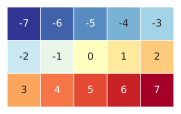

In [25]:
visualize_2D(A_3_by_5, '矩阵，3 x 5', 7, -7)

In [26]:
a_1D_array.reshape(3, -1)

array([[-7, -6, -5, -4, -3],
       [-2, -1,  0,  1,  2],
       [ 3,  4,  5,  6,  7]])

In [27]:
a_1D_array.reshape(-1, 5)

array([[-7, -6, -5, -4, -3],
       [-2, -1,  0,  1,  2],
       [ 3,  4,  5,  6,  7]])

### 改成 3 行 5 列，先列后行

In [28]:
A_3_by_5_col_order = a_1D_array.reshape(3, 5, order = 'F')
A_3_by_5_col_order

array([[-7, -4, -1,  2,  5],
       [-6, -3,  0,  3,  6],
       [-5, -2,  1,  4,  7]])

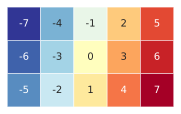

In [29]:
visualize_2D(A_3_by_5_col_order, '矩阵，3 x 5, 先列后行', 7, -7)

### 改成 5 行 3 列

In [30]:
A_5_by_3 = a_1D_array.reshape(5, 3)
A_5_by_3

array([[-7, -6, -5],
       [-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4],
       [ 5,  6,  7]])

In [31]:
a_1D_array.reshape(5, -1)

array([[-7, -6, -5],
       [-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4],
       [ 5,  6,  7]])

In [32]:
a_1D_array.reshape(-1, 3)

array([[-7, -6, -5],
       [-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4],
       [ 5,  6,  7]])

In [33]:
a_1D_array.reshape(5, int(len(a_1D_array)/5))
# 形状参数必须是整数，不能是float

array([[-7, -6, -5],
       [-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4],
       [ 5,  6,  7]])

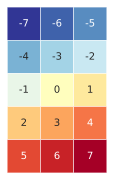

In [34]:
visualize_2D(A_5_by_3, '矩阵，5 x 3, 先行后列', 7, -7)

In [35]:
A_5_by_3_col_order = a_1D_array.reshape(5, 3, order = 'F')
A_5_by_3_col_order

array([[-7, -2,  3],
       [-6, -1,  4],
       [-5,  0,  5],
       [-4,  1,  6],
       [-3,  2,  7]])

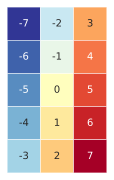

In [36]:
visualize_2D(A_5_by_3_col_order, '矩阵，5 x 3, 先列后行', 7, -7)

### 从 3 * 5 到 5 * 3

In [37]:
A_3_by_5.reshape(5,3)

array([[-7, -6, -5],
       [-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4],
       [ 5,  6,  7]])

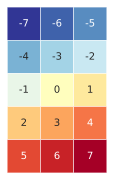

In [38]:
visualize_2D(A_3_by_5.reshape(5,3), '从 3 X 5 到 5 X 3', 7, -7)

In [39]:
np.reshape(np.reshape(a_1D_array, (3,5)), (5,3))

array([[-7, -6, -5],
       [-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4],
       [ 5,  6,  7]])

In [40]:
a_1D_array.reshape(3,5).reshape(5,3)

array([[-7, -6, -5],
       [-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4],
       [ 5,  6,  7]])

In [41]:
a_1D_array.reshape(3,-1).reshape(5,-1)

array([[-7, -6, -5],
       [-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4],
       [ 5,  6,  7]])

In [42]:
A_3_by_5_col_order.reshape(5,3)

array([[-7, -4, -1],
       [ 2,  5, -6],
       [-3,  0,  3],
       [ 6, -5, -2],
       [ 1,  4,  7]])

### 变成三维 3D

In [43]:
a_1D_array_long = np.arange(-13,13 + 1)
a_1D_array_long

array([-13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,
         0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13])

In [44]:
visualize_1D(a_1D_array_long, '1D数组，27元素')

In [45]:
A_3D_3_by_3_by_3 = a_1D_array_long.reshape(3,3,3)
A_3D_3_by_3_by_3

array([[[-13, -12, -11],
        [-10,  -9,  -8],
        [ -7,  -6,  -5]],

       [[ -4,  -3,  -2],
        [ -1,   0,   1],
        [  2,   3,   4]],

       [[  5,   6,   7],
        [  8,   9,  10],
        [ 11,  12,  13]]])

In [46]:
a_1D_array_long.reshape(3,3,-1)

array([[[-13, -12, -11],
        [-10,  -9,  -8],
        [ -7,  -6,  -5]],

       [[ -4,  -3,  -2],
        [ -1,   0,   1],
        [  2,   3,   4]],

       [[  5,   6,   7],
        [  8,   9,  10],
        [ 11,  12,  13]]])

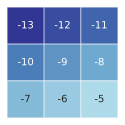

In [47]:
visualize_2D(A_3D_3_by_3_by_3[0,:,:], '3D_第一页', 13, -13)

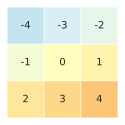

In [48]:
visualize_2D(A_3D_3_by_3_by_3[1,:,:], '3D_第二页', 13, -13)

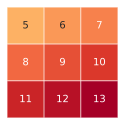

In [49]:
visualize_2D(A_3D_3_by_3_by_3[2,:,:], '3D_第三页', 13, -13)

### 视图 vs 副本

In [50]:
# 判断是否共享内存？
np.shares_memory(a_1D_array, A_5_by_3)

True

In [51]:
np.shares_memory(a_1D_array, a_col_vector)

True

In [52]:
np.shares_memory(a_1D_array, a_row_vector)

True

In [53]:
# 新形状和原始形状的元素数量相同，返回视图
a = np.array([[1, 2], [3, 4]])
b = a.reshape(4)
print(b)     # [1 2 3 4]
b[0] = 0
print(a)     # [[0 2], [3 4]]

[1 2 3 4]
[[0 2]
 [3 4]]


### 转置

In [54]:
# 一维数组的转置还是其本身
a_1D_array.T

array([-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7])

In [55]:
a_row_vector.T

array([[-7],
       [-6],
       [-5],
       [-4],
       [-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7]])

In [56]:
np.transpose(a_row_vector)

array([[-7],
       [-6],
       [-5],
       [-4],
       [-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7]])

In [57]:
a_col_vector.T

array([[-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7]])

In [58]:
np.transpose(a_col_vector)

array([[-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7]])

In [59]:
A_3_by_5_T = A_3_by_5.T
A_3_by_5_T

array([[-7, -2,  3],
       [-6, -1,  4],
       [-5,  0,  5],
       [-4,  1,  6],
       [-3,  2,  7]])

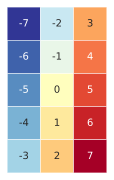

In [60]:
visualize_2D(A_3_by_5_T, '矩阵，3 x 5, 转置', 7, -7)

In [61]:
np.transpose(A_3_by_5)

array([[-7, -2,  3],
       [-6, -1,  4],
       [-5,  0,  5],
       [-4,  1,  6],
       [-3,  2,  7]])

In [62]:
# 视图 vs 副本
# 定义一个二维数组
arr = np.array([[1, 2, 3], [4, 5, 6]])

# 使用.transpose()方法得到数组的转置
arr_transpose = arr.transpose()

# 使用.T属性得到数组的转置
arr_T = arr.T

# 修改新数组中的元素
arr_transpose[0, 1] = 100
arr_T[2, 0] = 200

# 输出结果
print("原始数组：")
print(arr)
print("使用.transpose()方法得到的数组的转置：")
print(arr_transpose)
print("使用.T属性得到的数组的转置：")
print(arr_T)

原始数组：
[[  1   2 200]
 [100   5   6]]
使用.transpose()方法得到的数组的转置：
[[  1 100]
 [  2   5]
 [200   6]]
使用.T属性得到的数组的转置：
[[  1 100]
 [  2   5]
 [200   6]]


### 扁平化

In [63]:
A_3_by_5.ravel()
# 需要注意的是，ravel()函数返回的是原始数组的视图（view），而不是其副本（copy）。
# 因此，如果修改新数组中的任何元素，原始数组也会受到影响。
# 如果需要返回一个数组副本，可以使用flatten()函数。

array([-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7])

In [64]:
A_3_by_5.ravel().shape

(15,)

In [65]:
A_3_by_5.ravel().ndim

1

In [66]:
A_3_by_5.reshape(-1)

array([-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7])

In [67]:
A_3_by_5.ravel(order = 'F')

array([-7, -2,  3, -6, -1,  4, -5,  0,  5, -4,  1,  6, -3,  2,  7])

In [68]:
A_3_by_5_flatten = A_3_by_5.flatten()
# A_3_by_5_flatten是A_3_by_5的副本

In [69]:
A_3_by_5_flatten[0] = 1000
A_3_by_5_flatten

array([1000,   -6,   -5,   -4,   -3,   -2,   -1,    0,    1,    2,    3,
          4,    5,    6,    7])

In [70]:
A_3_by_5
# A_3_by_5并没有变化

array([[-7, -6, -5, -4, -3],
       [-2, -1,  0,  1,  2],
       [ 3,  4,  5,  6,  7]])

In [71]:
# 视图 vs 副本

# 定义一个多维数组
arr = np.array([[1, 2, 3], [4, 5, 6]])

# 使用flatten()函数将多维数组降为一维数组
new_arr1 = arr.flatten()

# 使用ravel()函数将多维数组降为一维数组
new_arr2 = arr.ravel()

# 修改新数组中的元素
new_arr1[-1] = 1000
new_arr2[0] = 200

# 输出结果
print("原始数组：")
print(arr)
print("使用flatten()函数得到的一维数组：")
print(new_arr1)
print("使用ravel()函数得到的一维数组：")
print(new_arr2)

原始数组：
[[200   2   3]
 [  4   5   6]]
使用flatten()函数得到的一维数组：
[   1    2    3    4    5 1000]
使用ravel()函数得到的一维数组：
[200   2   3   4   5   6]


### 旋转

In [72]:
A_3_by_5

array([[-7, -6, -5, -4, -3],
       [-2, -1,  0,  1,  2],
       [ 3,  4,  5,  6,  7]])

In [73]:
np.rot90(A_3_by_5)

array([[-3,  2,  7],
       [-4,  1,  6],
       [-5,  0,  5],
       [-6, -1,  4],
       [-7, -2,  3]])

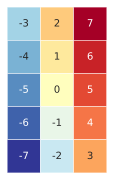

In [74]:
visualize_2D(np.rot90(A_3_by_5), '逆时针旋转90度', 7, -7)

In [75]:
A_3_by_5_anti_c_90 = np.rot90(A_3_by_5)

In [76]:
# 视图 vs 副本

# 创建一个 2x2 的二维数组
arr = np.array([[1, 2], [3, 4]])

# 将数组逆时针旋转90度，得到数组的视图
rotated_arr = np.rot90(arr)

# 修改视图的值
rotated_arr[0, 0] = 100

# 打印原数组和修改后的视图
print("原数组：")
print(arr)

print("修改后的视图：")
print(rotated_arr)

原数组：
[[  1 100]
 [  3   4]]
修改后的视图：
[[100   4]
 [  1   3]]


### 翻转

In [77]:
np.flip(A_3_by_5)
# 沿着所有轴翻转

array([[ 7,  6,  5,  4,  3],
       [ 2,  1,  0, -1, -2],
       [-3, -4, -5, -6, -7]])

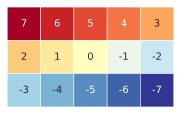

In [78]:
visualize_2D(np.flip(A_3_by_5), '沿着所有轴翻转', 7, -7)

In [79]:
# 沿着指定的轴翻转

# 沿着指定轴进行翻转
arr3 = np.array([[1, 2], [3, 4], [5, 6]])
flipped_arr3 = np.flip(arr3, axis=0)  # 沿着第一个轴进行翻转
print(flipped_arr3)
# 输出 [[5 6] [3 4] [1 2]]

flipped_arr4 = np.flip(arr3, axis=1)  # 沿着第二个轴进行翻转
print(flipped_arr4)
# 输出 [[2 1] [4 3] [6 5]]

flipped_arr5 = np.flip(arr3, axis=(0, 1))  # 沿着所有轴进行翻转
print(flipped_arr5)
# 输出 [[6 5] [4 3] [2 1]]

[[5 6]
 [3 4]
 [1 2]]
[[2 1]
 [4 3]
 [6 5]]
[[6 5]
 [4 3]
 [2 1]]


In [80]:
np.flipud(A_3_by_5)

array([[ 3,  4,  5,  6,  7],
       [-2, -1,  0,  1,  2],
       [-7, -6, -5, -4, -3]])

In [81]:
np.fliplr(A_3_by_5)

array([[-3, -4, -5, -6, -7],
       [ 2,  1,  0, -1, -2],
       [ 7,  6,  5,  4,  3]])

In [82]:
# Repo: https://github.com/Visualize-ML
# Book 1 Python for Beginners  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023